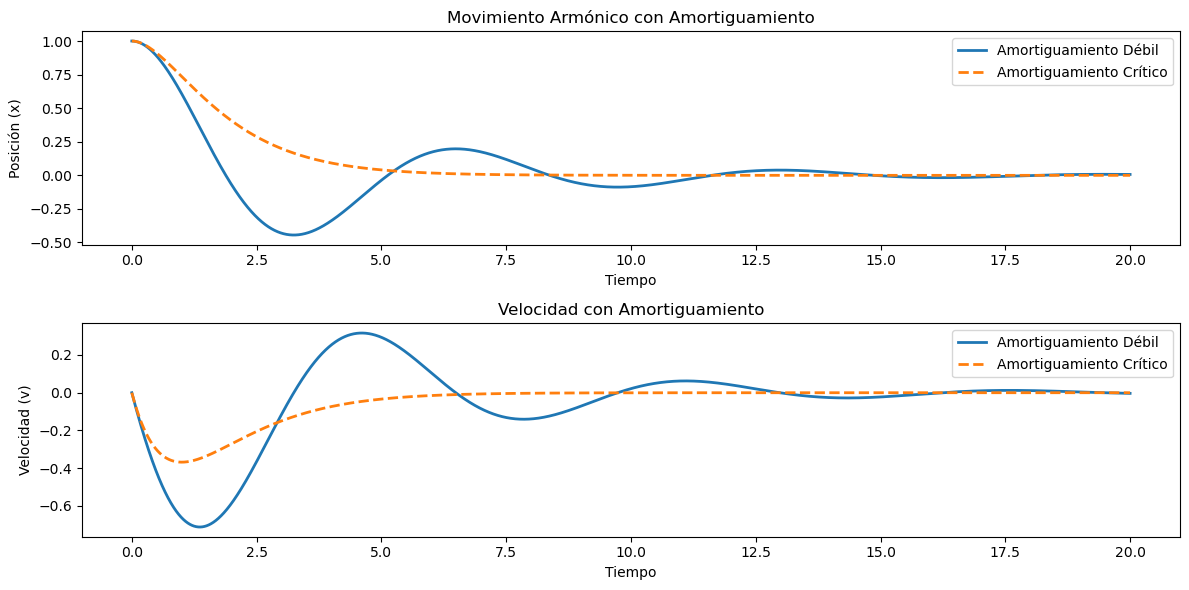

In [1]:
import matplotlib.pyplot as plt

def runge_kutta(h, gamma, omega_0, x0, v0, T):
    
    def f(t, x, v):
        return v
    
    def g(t, x, v):
        return -gamma * v - omega_0**2 * x

    t_values = []
    x_values = []
    v_values = []

    t = 0
    x = x0
    v = v0

    while t <= T:
        t_values.append(t)
        x_values.append(x)
        v_values.append(v)

        k1x = h * f(t, x, v)
        k1v = h * g(t, x, v)

        k2x = h * f(t + h/2, x + k1x/2, v + k1v/2)
        k2v = h * g(t + h/2, x + k1x/2, v + k1v/2)

        k3x = h * f(t + h/2, x + k2x/2, v + k2v/2)
        k3v = h * g(t + h/2, x + k2x/2, v + k2v/2)

        k4x = h * f(t + h, x + k3x, v + k3v)
        k4v = h * g(t + h, x + k3x, v + k3v)

        x = x + (k1x + 2*k2x + 2*k3x + k4x)/6
        v = v + (k1v + 2*k2v + 2*k3v + k4v)/6

        t += h

    return t_values, x_values, v_values

h = 0.001
gamma_weak = 0.5
gamma_critical = 2.0
omega_0 = 1.0
x0 = 1.0
v0 = 0.0
T = 20.0

t_weak, x_weak, v_weak = runge_kutta(h, gamma_weak, omega_0, x0, v0, T)
t_critical, x_critical, v_critical = runge_kutta(h, gamma_critical, omega_0, x0, v0, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_weak, x_weak, label='Amortiguamiento Débil', linestyle='-', linewidth=2)
plt.plot(t_critical, x_critical, label='Amortiguamiento Crítico', linestyle='--', linewidth=2)
plt.title('Movimiento Armónico con Amortiguamiento')
plt.xlabel('Tiempo')
plt.ylabel('Posición (x)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_weak, v_weak, label='Amortiguamiento Débil', linestyle='-', linewidth=2)
plt.plot(t_critical, v_critical, label='Amortiguamiento Crítico', linestyle='--', linewidth=2)
plt.title('Velocidad con Amortiguamiento')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad (v)')
plt.legend()

plt.tight_layout()
plt.show()